In [37]:
import scipy.linalg as sc
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import serial
from MRPy import MRPy

In [2]:
data = MRPy.from_file('DATA/med_6Y', form = 'Excel')

In [3]:
data

MRPy([[-0.03838474, -0.09830764, -0.07947409, ...,  0.01078378,
        0.00146421, -0.0257394 ],
      [-0.44563277, -0.41781143, -0.43920347, ...,  0.03199268,
       -0.04459261, -0.05479102],
      [-0.00078414, -0.02218518, -0.03713293, ..., -0.10448933,
       -0.01733114, -0.05644075]])

In [4]:
print('Average sampling rate is {0:5.1f}Hz.'.format(data.fs))

print(data.mean(axis=1))

Average sampling rate is 367.9Hz.
[ 1.11082706e-16 -4.44572441e-16  2.68434773e-16]


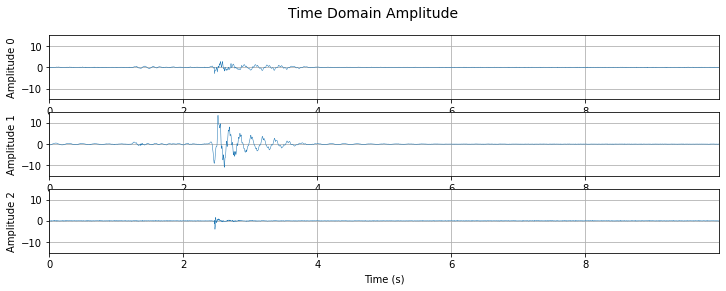

In [5]:
# %matplotlib qt
%matplotlib inline 

lim_sup = 15.
lim_inf = -15.

fig1 = data.plot_time(fig=1, figsize=(12,4), axis_t=[0, data.Td, lim_inf, lim_sup])


 fs = 367.9Hz
 Td = 1.8s

 NX = 3
 N  = 660
 M  = 331



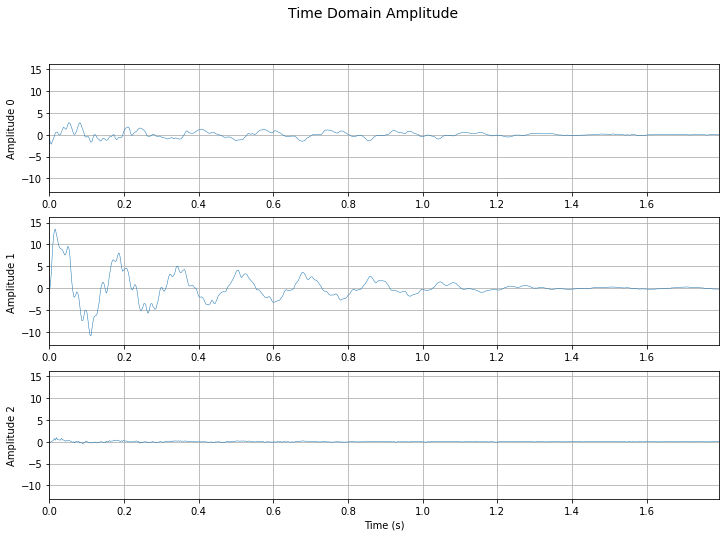

In [6]:
# %matplotlib qt
%matplotlib inline 

tempo_i = 2.502
tempo_j = 4.3
duracao = tempo_j - tempo_i

free = data.extract((tempo_i, tempo_j), by='time')

free.printAttrib()
free.plot_time(fig=2);


Amplitude:     10.73 m/s²
Frequency:     6.08Hz  
Damping ratio: 7.04%   
Phase:         0.95rad 


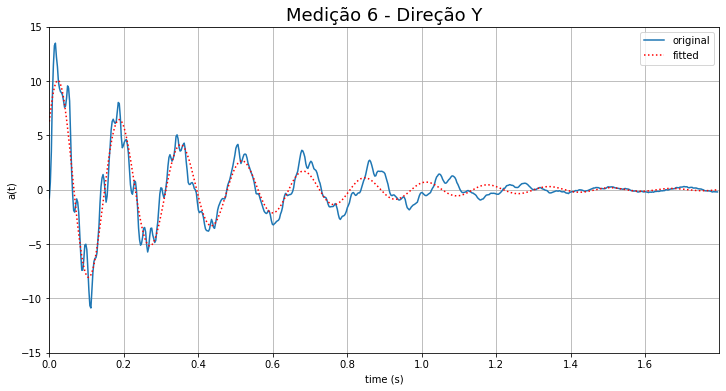

In [7]:
# %matplotlib qt
%matplotlib inline 

afit, par = free.fit_decay()
t         = free.t_axis()               # prepare time axis for plotting
plt.figure(3, figsize=(12, 6), clear=True)
plt.plot(t, free[1])
plt.plot(t, afit[1], 'r:')
plt.legend(('original','fitted'))
plt.title('Medição 6 - Direção Y', fontsize = 18)

plt.xlim( 0, duracao);  plt.xlabel('time (s)') 
plt.ylim(lim_inf, lim_sup);  plt.ylabel('a(t)') 

plt.grid(True) 

print('Amplitude:     {0:4.2f} m/s²'.format(par[1,0]))
print('Frequency:     {0:4.2f}Hz  '.format(par[1,1]))
print('Damping ratio: {0:4.2f}%   '.format(par[1,2]*100))
print('Phase:         {0:4.2f}rad '.format(par[1,3]))


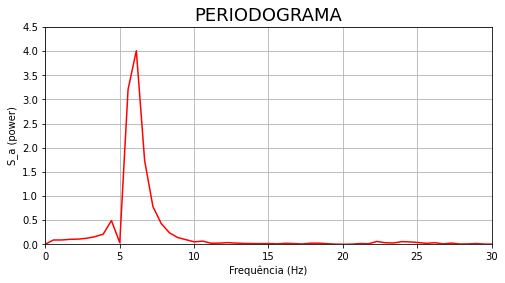

In [8]:
# %matplotlib qt
%matplotlib inline 

Sa, fs = free.periodogram()
f       = free.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Sa[1], color = 'red')

plt.xlim(0, 30);   plt.xlabel('Frequência (Hz)') 
plt.ylim(0,  4.5);   plt.ylabel('S_a (power)') 

plt.title('PERIODOGRAMA', fontsize = 18)
plt.grid(True) 

In [9]:
f_max =f[Sa[1].argmax()]
f_max

6.1313990328497585

## Velocidade

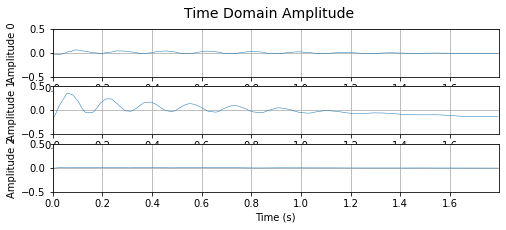

In [10]:
# %matplotlib qt
%matplotlib inline 

V1  =  free.integrate()  
f03 =  V1.plot_time(fig=3, figsize=(8,3), axis_t=[0,  duracao, -0.50, 0.50])

## Deslocamento

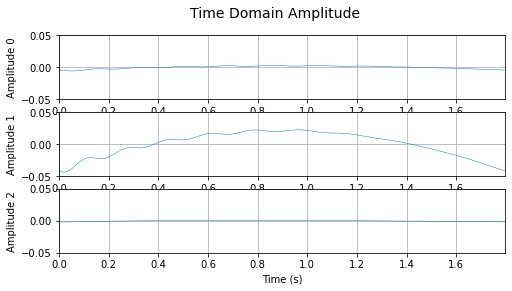

In [11]:
# %matplotlib qt
%matplotlib inline 

D1 = V1.integrate()
f04 = D1.plot_time(fig=3, figsize=(8,4), axis_t=[0,  duracao, -0.050, 0.050])

# DIREÇÃO X

In [12]:
frequencias = [5.422, 5.358, 5.669, 5.65, 5.638, 5.622]

μ_freq_x = np.mean(frequencias)

std_freq_x = np.std(frequencias)

print('--------------------------------------------','\n',
      'Frequência fundamental média da estrutura:           {0:5.2f} Hz'.format(μ_freq_x),'\n',
      'Desvio padrão:                                       {0:5.2f} Hz'.format(std_freq_x),'\n',
      '--------------------------------------------')


-------------------------------------------- 
 Frequência fundamental média da estrutura:            5.56 Hz 
 Desvio padrão:                                        0.12 Hz 
 --------------------------------------------


# DIREÇÃO Y

In [13]:
frequencias = [5.616, 5.598, 6.284, 5.839, 5.766, 6.131]

μ_freq_y = np.mean(frequencias)

std_freq_y = np.std(frequencias)

print('--------------------------------------------','\n',
      'Frequência fundamental média da estrutura:           {0:5.2f} Hz'.format(μ_freq_y),'\n',
      'Desvio padrão:                                       {0:5.2f} Hz'.format(std_freq_y),'\n',
      '--------------------------------------------')


-------------------------------------------- 
 Frequência fundamental média da estrutura:            5.87 Hz 
 Desvio padrão:                                        0.25 Hz 
 --------------------------------------------


# CÁLCULO DA FREQUÊNCIA ATRAVÉS DAS PROPRIEDADES

In [14]:
# H_1 = 0.09 # em [ m ] 

# M_1 = 0.1215 # em [ kg] 

# D_1 = 2.1/1000   # diâmetro em metros

# I_1 = (D_1**4)*np.pi/64

# E_1 = 190e9

# k_1 = 12*E_1*I_1/(H_1**3)
# # k_1 = 915

In [15]:
# k_1

In [16]:
# def vibration_modes(K, M):

# # 1. Uses scipy to solve the standard eigenvalue problem
#     w2, Phi = sc.eig(K, M)

# # 2. Ensure ascending order of eigenvalues
#     iw  = w2.argsort()
#     w2  = w2[iw]
#     Phi = Phi[:,iw]

# # 3. Eigenvalues to vibration frequencies
#     wk  = np.sqrt(np.real(w2)) 
#     fk  = wk/2/np.pi

# # 4. Mass matrix normalization
#     Mk = np.diag(np.dot(Phi.T, np.dot(M, Phi)))
    
#     for k in range(len(wk)):
#         Phi[:,k] = Phi[:,k]/np.sqrt(Mk[k])
            
# # 5. Return results
#     return fk, wk, Phi

In [17]:
# # MATRIZ DE RIGIDEZ


# KG_1 = k_1*np.array([[ 2, -2,  0,  0, 0], 
#                  [-2,  4, -2,  0, 0],
#                  [ 0, -2,  4, -2, 0], 
#                  [ 0,  0, -2,  4,-2], 
#                  [ 0,  0,  0, -2, 4]])

In [18]:
# # MATRIZ DE MASSA

# MG_1 = M_1*np.array([[ 1,  0,  0,  0, 0], 
#                  [ 0,  1,  0,  0, 0],
#                  [ 0,  0,  1,  0, 0], 
#                  [ 0,  0,  0,  1, 0], 
#                  [ 0,  0,  0,  0, 1]])

In [19]:
# fk, wk, Phi = vibration_modes(KG_1, MG_1)

In [20]:
# fk

# CÁLCULO DA RIGIDEZ

In [21]:
H = 0.09 # em [ m ] 

M = 0.1215 # em [ kg] 

f1 = 5.56  # em [Hz]

g = 9.81  # gravidade em m/s²

In [22]:
def vibration_modes(K, M):

# 1. Uses scipy to solve the standard eigenvalue problem
    w2, Phi = sc.eig(K, M)

# 2. Ensure ascending order of eigenvalues
    iw  = w2.argsort()
    w2  = w2[iw]
    Phi = Phi[:,iw]

# 3. Eigenvalues to vibration frequencies
    wk  = np.sqrt(np.real(w2)) 
    fk  = wk/2/np.pi

# 4. Mass matrix normalization
    Mk = np.diag(np.dot(Phi.T, np.dot(M, Phi)))
    
    for k in range(len(wk)):
        Phi[:,k] = Phi[:,k]/np.sqrt(Mk[k])
            
# 5. Return results
    return fk, wk, Phi

In [23]:
# MATRIZ DE RIGIDEZ

k =1            # rigidez de cada coluna (incógnita)

KG = k*np.array([[ 2, -2,  0,  0, 0], 
                    [-2,  4, -2,  0, 0],
                    [ 0, -2,  4, -2, 0], 
                    [ 0,  0, -2,  4,-2], 
                    [ 0,  0,  0, -2, 4]])

In [24]:
# MATRIZ DE MASSA

MG = M*np.array([[ 1,  0,  0,  0, 0], 
                 [ 0,  1,  0,  0, 0],
                 [ 0,  0,  1,  0, 0], 
                 [ 0,  0,  0,  1, 0], 
                 [ 0,  0,  0,  0, 1]])

In [26]:
fk, wk, Phi = vibration_modes(KG, MG)

K  = (f1/fk[0])**2                       # determina a rigidez correta
fk =  fk*np.sqrt(K)                    # calcula todas as frequências
wk =  fk*2*np.pi                         # em rad/s

print('Rigidez individual de cada barra: {0:6.0f} N/m.'.format(K))
print()
print(fk[:])
print()
print(wk[:])

Rigidez individual de cada barra:    915 N/m.

[ 5.56       16.22956187 25.58430115 32.86635251 37.48576746]

[ 34.93451031 101.97334466 160.75090509 206.50538321 235.53002332]


In [31]:
D_1 = 2.1/1000   # diâmetro em metros

I_1 = (D_1**4)*np.pi/64

E_1 = 190e9

H_1 = 0.09

k_1 = 12*E_1*I_1/(H_1**3)

k_1

2985.7565680023517

In [35]:
constante = (96*E_1*I_1/(H_1**3))**(1/3)

constante

28.799268782882816

# Análise da propagação de erro

In [38]:
E = 200e9

D_1 = 2.1/1000   # diâmetro em metros
I_1 = (D_1**4)*np.pi/64
I = st.norm(I_1, I_1*0.01)

M = st.norm(121.5/1000,121.5*0.01/1000)

L = st.norm(0.09, 0.09*0.005)


#----------------------------------#
def autoval(E,I,L,M):
    
    K = (12*E*I/(L*L*L))
    
    
    M_K = K*np.array([[ 2, -2,  0,  0, 0], 
                      [-2,  4, -2,  0, 0],
                      [ 0, -2,  4, -2, 0], 
                      [ 0,  0, -2,  4,-2], 
                      [ 0,  0,  0, -2, 4]])
    
    M_M = np.identity(5)*M
   
    w21,Phi1 = sc.eig(M_K,M_M)



    iw = w21.argsort()
    w21 = w21[iw]                       
    Phi1 = Phi1[:,iw]

    wr = np.real(w21)
    wk = np.sqrt(w21)
    fk = wk/(2*np.pi)
    
    return fk[0]
#------------------------------------#
n = 10000
ii = I.rvs(n)
m = M.rvs(n)
l = L.rvs(n)
fi = []
for i in range(n):
    
    f = autoval(E,ii[i],l[i],m[i])
    fi += [np.real(f)]
    
mi_f = np.mean(fi)
sigma_f = np.std(fi)
print('---------------------------------------','\n',
      'Valor médio da frequência:               {0:5.2f} Hz'.format((mi_f)),'\n',
      'Desvio Padrão da frequência (erro):      {0:5.2f} Hz' .format(sigma_f),'\n',
      'Coeficiente de variação:                 {0:5.2f} %'.format(sigma_f/np.real(mi_f)*100),'\n',
      '--------------------------------------')

--------------------------------------- 
 Valor médio da frequência:               10.31 Hz 
 Desvio Padrão da frequência (erro):       0.10 Hz 
 Coeficiente de variação:                  1.02 % 
 --------------------------------------


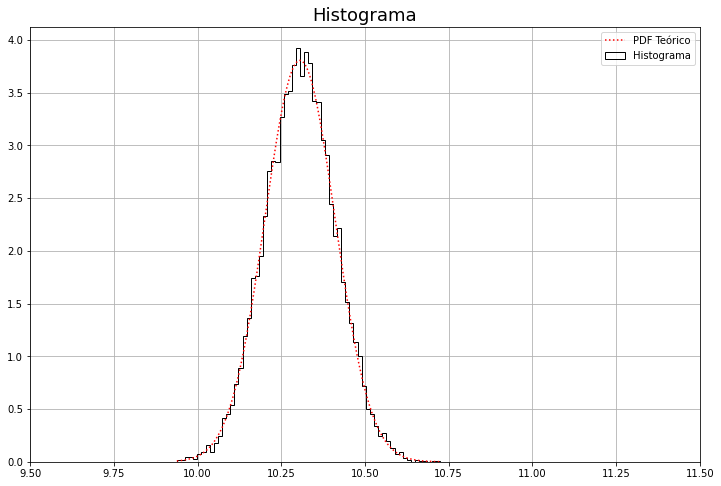

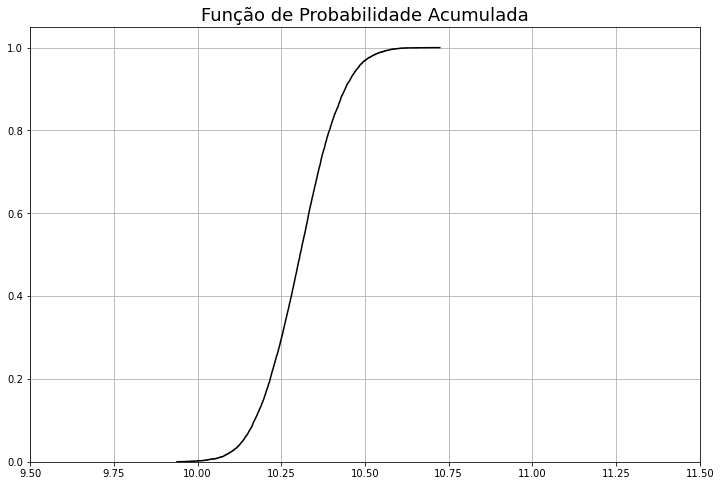

In [39]:
# %matplotlib qt
%matplotlib inline 

fx = sorted(fi)               #Colocando em ordem as frequências
fp = st.norm(mi_f,sigma_f)    # Criando uma distribuição gaussiana 
p = np.arange(0,n)/(n-1)      # Cálculo da função de probabilidade acumulada

histograma  = plt.figure(5, figsize=(12,8))
hist1 = plt.hist(fx, bins= 64, density=True,color = 'black', histtype = 'step')
plt.grid(True)


plt.plot(fx,fp.pdf(fx),'r:')
plt.xlim(9.5,11.5)
plt.title('Histograma',fontsize = 18)
plt.legend(('PDF Teórico','Histograma'))
plt.grid(True)




f02  = plt.figure(2, figsize=(12,8))

f02a = plt.plot(fx, p, drawstyle='steps', color = 'black')

plt.axis([9.5, 11.5, 0, 1.05])
plt.title('Função de Probabilidade Acumulada', fontsize = 18)
plt.grid(True)